# Dataset Overview

### Load Packages

In [155]:
# numerical calculation & data frames
import numpy as np
import pandas as pd

# visualization
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn.objects as so

# statistics
import statsmodels.api as sm

# custom plot
from sbcustom import *

### Set Options

In [156]:
# pandas options
pd.set_option("mode.copy_on_write", True)
pd.options.display.precision = 2
pd.options.display.float_format = '{:.2f}'.format  # pd.reset_option('display.float_format')
pd.options.display.max_rows = 13

# Numpy options
np.set_printoptions(precision = 2, suppress=True)

### Load dataset

In [157]:
car = pd.read_csv('train-data.csv')

Shape of data

In [158]:
print('Shape of data: ', car.shape)

Shape of data:  (6019, 14)


Few observations

In [159]:
car.head(5)

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.00,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.00,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.00,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.00,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.00,NaN,17.74


In [160]:
car.info

<bound method DataFrame.info of       Unnamed: 0                              Name    Location  Year  \
0              0            Maruti Wagon R LXI CNG      Mumbai  2010   
1              1  Hyundai Creta 1.6 CRDi SX Option        Pune  2015   
2              2                      Honda Jazz V     Chennai  2011   
3              3                 Maruti Ertiga VDI     Chennai  2012   
4              4   Audi A4 New 2.0 TDI Multitronic  Coimbatore  2013   
...          ...                               ...         ...   ...   
6014        6014                  Maruti Swift VDI       Delhi  2014   
6015        6015          Hyundai Xcent 1.1 CRDi S      Jaipur  2015   
6016        6016             Mahindra Xylo D4 BSIV      Jaipur  2012   
6017        6017                Maruti Wagon R VXI     Kolkata  2013   
6018        6018             Chevrolet Beat Diesel   Hyderabad  2011   

      Kilometers_Driven Fuel_Type Transmission Owner_Type     Mileage  \
0                 72000       

Feature Statistics Summary

In [161]:
car.describe()

,Unnamed: 0,Year,Kilometers_Driven,Seats,Price
count,6019.00,6019.00,6019.00,5977.00,6019.00
mean,3009.00,2013.36,58738.38,5.28,9.48
std,1737.68,3.27,91268.84,0.81,11.19
min,0.00,1998.00,171.00,0.00,0.44
25%,1504.50,2011.00,34000.00,5.00,3.50
50%,3009.00,2014.00,53000.00,5.00,5.64
75%,4513.50,2016.00,73000.00,5.00,9.95
max,6018.00,2019.00,6500000.00,10.00,160.00


해당 데이터를 관찰하였을 떄, Unnamed: 0 열은 필요가 없어보임

Name열은 제조사와 자동차의 모델을 알려주는데, 너무 길고, unique한 값들이 많아보임.

따라서 Name은 처리를 통해 제조사를 표현하도록 변경

Mileage, Engine, Power열은 수치형 데이터이지만, object로 표현되어있고, 단위가 포함되어있어 처리가 필요해보임.

object 타입에서 각각 int형 혹은 float형으로 변경

# EDA

In [162]:
car.drop(['Unnamed: 0'], axis=1, inplace=True)
car

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.00,NaN,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.00,NaN,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.00,8.61 Lakh,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.00,NaN,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.00,NaN,17.74
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6014,Maruti Swift VDI,Delhi,2014,27365,Diesel,Manual,First,28.4 kmpl,1248 CC,74 bhp,5.00,7.88 Lakh,4.75
6015,Hyundai Xcent 1.1 CRDi S,Jaipur,2015,100000,Diesel,Manual,First,24.4 kmpl,1120 CC,71 bhp,5.00,NaN,4.00
6016,Mahindra Xylo D4 BSIV,Jaipur,2012,55000,Diesel,Manual,Second,14.0 kmpl,2498 CC,112 bhp,8.00,NaN,2.90
6017,Maruti Wagon R VXI,Kolkata,2013,46000,Petrol,Manual,First,18.9 kmpl,998 CC,67.1 bhp,5.00,NaN,2.65


결측치에 대한 확인

In [163]:
car.isna().sum()

Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 36
Power                  36
Seats                  42
New_Price            5195
Price                   0
dtype: int64

결측치를 확인하였을 떄, New_Price열에 대한 결측치는 5195개로, 전체 데이터의 86%에 해당함.

따라서 해당 열은 평균값으로 대체한다고 해도 원하는 예측을 할 수 없을 것으로 판단되어, 삭제하도록 함.

Engine열에 대한 결측치는 36개로, 전체 데이터의 0.6%에 해당함.

Power열에 대한 결측치는 36개로, 전체 데이터의 0.6%에 해당함.

Seats열에 대한 결측치는 42개로, 전체 데이터의 0.7%에 해당함.

평균값으로 대체하는 방법도 있겠지만, 우선 결측치는 제거하고 분석진행

In [164]:
car.drop(['New_Price'], axis=1, inplace=True)
car

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.00,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.00,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.00,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.00,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.00,17.74
...,...,...,...,...,...,...,...,...,...,...,...,...
6014,Maruti Swift VDI,Delhi,2014,27365,Diesel,Manual,First,28.4 kmpl,1248 CC,74 bhp,5.00,4.75
6015,Hyundai Xcent 1.1 CRDi S,Jaipur,2015,100000,Diesel,Manual,First,24.4 kmpl,1120 CC,71 bhp,5.00,4.00
6016,Mahindra Xylo D4 BSIV,Jaipur,2012,55000,Diesel,Manual,Second,14.0 kmpl,2498 CC,112 bhp,8.00,2.90
6017,Maruti Wagon R VXI,Kolkata,2013,46000,Petrol,Manual,First,18.9 kmpl,998 CC,67.1 bhp,5.00,2.65


In [165]:
car.dropna(inplace=True)
car = car.reset_index(drop=True)

In [166]:
names = list(car.Name)
for i in range(len(names)):
    names[i] = names[i].split()[0]
car.Name = names
car

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.00,1.75
1,Hyundai,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.00,12.50
2,Honda,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.00,4.50
3,Maruti,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.00,6.00
4,Audi,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.00,17.74
...,...,...,...,...,...,...,...,...,...,...,...,...
5970,Maruti,Delhi,2014,27365,Diesel,Manual,First,28.4 kmpl,1248 CC,74 bhp,5.00,4.75
5971,Hyundai,Jaipur,2015,100000,Diesel,Manual,First,24.4 kmpl,1120 CC,71 bhp,5.00,4.00
5972,Mahindra,Jaipur,2012,55000,Diesel,Manual,Second,14.0 kmpl,2498 CC,112 bhp,8.00,2.90
5973,Maruti,Kolkata,2013,46000,Petrol,Manual,First,18.9 kmpl,998 CC,67.1 bhp,5.00,2.65


Name열을 제조사별로 표현

In [167]:
mileages = list(car.Mileage)
for i in range(len(mileages)):
    mileages[i] = mileages[i].split(' ', 1)[0]
car.Mileage = mileages
car

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti,Mumbai,2010,72000,CNG,Manual,First,26.6,998 CC,58.16 bhp,5.00,1.75
1,Hyundai,Pune,2015,41000,Diesel,Manual,First,19.67,1582 CC,126.2 bhp,5.00,12.50
2,Honda,Chennai,2011,46000,Petrol,Manual,First,18.2,1199 CC,88.7 bhp,5.00,4.50
3,Maruti,Chennai,2012,87000,Diesel,Manual,First,20.77,1248 CC,88.76 bhp,7.00,6.00
4,Audi,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2,1968 CC,140.8 bhp,5.00,17.74
...,...,...,...,...,...,...,...,...,...,...,...,...
5970,Maruti,Delhi,2014,27365,Diesel,Manual,First,28.4,1248 CC,74 bhp,5.00,4.75
5971,Hyundai,Jaipur,2015,100000,Diesel,Manual,First,24.4,1120 CC,71 bhp,5.00,4.00
5972,Mahindra,Jaipur,2012,55000,Diesel,Manual,Second,14.0,2498 CC,112 bhp,8.00,2.90
5973,Maruti,Kolkata,2013,46000,Petrol,Manual,First,18.9,998 CC,67.1 bhp,5.00,2.65


In [168]:
engines = list(car.Engine)
for i in range(len(engines)):
    engines[i] = engines[i].split(' ', 1)[0]
car.Engine = engines
car

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti,Mumbai,2010,72000,CNG,Manual,First,26.6,998,58.16 bhp,5.00,1.75
1,Hyundai,Pune,2015,41000,Diesel,Manual,First,19.67,1582,126.2 bhp,5.00,12.50
2,Honda,Chennai,2011,46000,Petrol,Manual,First,18.2,1199,88.7 bhp,5.00,4.50
3,Maruti,Chennai,2012,87000,Diesel,Manual,First,20.77,1248,88.76 bhp,7.00,6.00
4,Audi,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2,1968,140.8 bhp,5.00,17.74
...,...,...,...,...,...,...,...,...,...,...,...,...
5970,Maruti,Delhi,2014,27365,Diesel,Manual,First,28.4,1248,74 bhp,5.00,4.75
5971,Hyundai,Jaipur,2015,100000,Diesel,Manual,First,24.4,1120,71 bhp,5.00,4.00
5972,Mahindra,Jaipur,2012,55000,Diesel,Manual,Second,14.0,2498,112 bhp,8.00,2.90
5973,Maruti,Kolkata,2013,46000,Petrol,Manual,First,18.9,998,67.1 bhp,5.00,2.65


In [169]:
powers = list(car.Power)
for i in range(len(powers)):
    powers[i] = powers[i].split(' ', 1)[0]
car.Power = powers
car

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti,Mumbai,2010,72000,CNG,Manual,First,26.6,998,58.16,5.00,1.75
1,Hyundai,Pune,2015,41000,Diesel,Manual,First,19.67,1582,126.2,5.00,12.50
2,Honda,Chennai,2011,46000,Petrol,Manual,First,18.2,1199,88.7,5.00,4.50
3,Maruti,Chennai,2012,87000,Diesel,Manual,First,20.77,1248,88.76,7.00,6.00
4,Audi,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2,1968,140.8,5.00,17.74
...,...,...,...,...,...,...,...,...,...,...,...,...
5970,Maruti,Delhi,2014,27365,Diesel,Manual,First,28.4,1248,74,5.00,4.75
5971,Hyundai,Jaipur,2015,100000,Diesel,Manual,First,24.4,1120,71,5.00,4.00
5972,Mahindra,Jaipur,2012,55000,Diesel,Manual,Second,14.0,2498,112,8.00,2.90
5973,Maruti,Kolkata,2013,46000,Petrol,Manual,First,18.9,998,67.1,5.00,2.65


Mileage, Engine, Power에 대한 단위 제거

In [176]:
car['Mileage'] = car['Mileage'].astype(float)
car['Engine'] = car['Engine'].astype(int)

Power 대한 자료형 변경 도중 에러 발생

이유는 Power값에 'null bhp'라는 값이 존재하기 때문

In [177]:
null_count = 0
null_position = []
for i in range(len(car.Power)):
    if car.Power[i] == 'null':
        null_count += 1
        null_position.append(i)
print('Number of null values: ', null_count)

Number of null values:  103


'null bhp'로 표현되어 있는 행 제거

In [179]:
car = car.drop(car.index[null_position])
car = car.reset_index(drop=True)
car

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti,Mumbai,2010,72000,CNG,Manual,First,26.60,998,58.16,5.00,1.75
1,Hyundai,Pune,2015,41000,Diesel,Manual,First,19.67,1582,126.2,5.00,12.50
2,Honda,Chennai,2011,46000,Petrol,Manual,First,18.20,1199,88.7,5.00,4.50
3,Maruti,Chennai,2012,87000,Diesel,Manual,First,20.77,1248,88.76,7.00,6.00
4,Audi,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968,140.8,5.00,17.74
...,...,...,...,...,...,...,...,...,...,...,...,...
5867,Maruti,Delhi,2014,27365,Diesel,Manual,First,28.40,1248,74,5.00,4.75
5868,Hyundai,Jaipur,2015,100000,Diesel,Manual,First,24.40,1120,71,5.00,4.00
5869,Mahindra,Jaipur,2012,55000,Diesel,Manual,Second,14.00,2498,112,8.00,2.90
5870,Maruti,Kolkata,2013,46000,Petrol,Manual,First,18.90,998,67.1,5.00,2.65


In [180]:
car['Power'] = car['Power'].astype(float)

성공적으로 수행 가능

In [181]:
car['Year'] = pd.Categorical(car['Year'])
car['Seats'] = pd.Categorical(car['Seats'])

Year과 Seats에 대해 Categorical type으로 변경

# Visualization

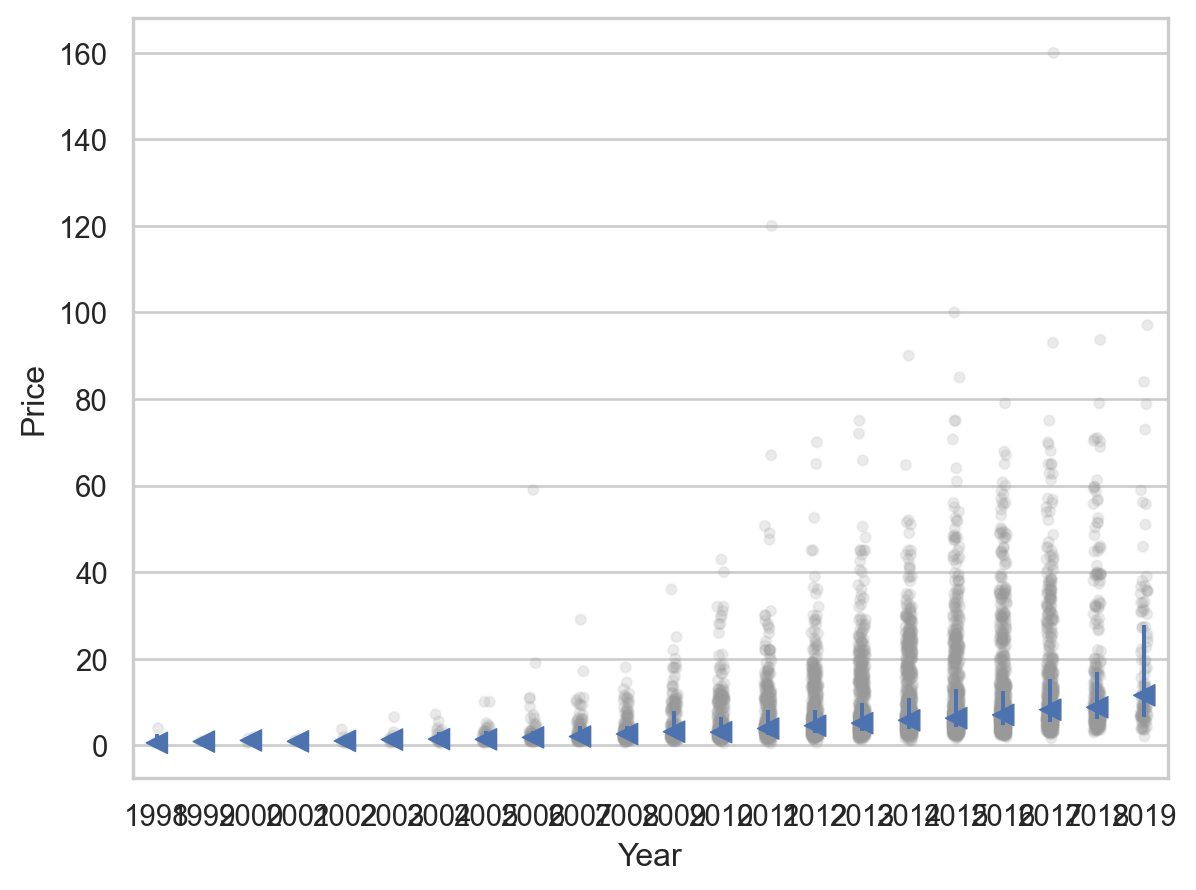

In [184]:
boxplot(car, 'Year', 'Price')